In [31]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product

BOARD_SIZE = 100
LADDER_LENGTH = 5
SNAKE_LENGTH = 5
NUM_SIMULATIONS = 1000

In [32]:
def generate_board(num_snakes, num_ladders):
    snakes_and_ladders = {}
    iterations = 0
    
    while True:
        iterations += 1
        
        potential_ladders = random.sample(range(1, BOARD_SIZE - LADDER_LENGTH), num_ladders)
        potential_snakes = random.sample(range(SNAKE_LENGTH + 1, BOARD_SIZE), num_snakes)
        
        snakes_and_ladders.clear()
        
        for ladder_start in potential_ladders:
            ladder_end = ladder_start + LADDER_LENGTH
            if ladder_end not in snakes_and_ladders:
                snakes_and_ladders[ladder_start] = ladder_end
                
        for snake_start in potential_snakes:
            snake_end = snake_start - SNAKE_LENGTH
            if snake_end not in snakes_and_ladders:
                snakes_and_ladders[snake_start] = snake_end
                
        overlaps = [pos for pos in snakes_and_ladders if list(snakes_and_ladders.values()).count(pos) > 1]
        if not overlaps:
            break
            
        for overlap in overlaps:
            if random.random() < 0.5:
                snake_start = [key for key, value in snakes_and_ladders.items() if value == overlap and key > overlap][0]
                del snakes_and_ladders[snake_start]
            else:
                ladder_start = [key for key, value in snakes_and_ladders.items() if value == overlap and key < overlap][0]
                del snakes_and_ladders[ladder_start]
    
    return snakes_and_ladders, iterations

In [33]:
def play_game(snakes_and_ladders):
    position = 0
    moves = 0
    
    while position < BOARD_SIZE:
        dice_roll = random.SystemRandom().randint(1, 6)
        position += dice_roll
        moves += 1
        
        if position in snakes_and_ladders:
            position = snakes_and_ladders[position]
        
        if position > BOARD_SIZE:
            position = BOARD_SIZE
    
    return moves

In [34]:
def analyze_board_configuration(num_snakes, num_ladders, num_realizations=10):
    total_iterations = 0
    all_game_times = []
    
    # Multiple realizations of the same configuration
    for _ in range(num_realizations):
        board, iterations = generate_board(num_snakes, num_ladders)
        total_iterations += iterations
        
        # Run simulations for this board
        game_times = [play_game(board) for _ in range(NUM_SIMULATIONS)]
        all_game_times.extend(game_times)
    
    avg_iterations = total_iterations / num_realizations
    avg_game_time = np.mean(all_game_times)
    
    return avg_iterations, avg_game_time



In [35]:
def run_analysis():
    # Define range of snakes and ladders to test
    snake_range = range(5, 16)
    ladder_range = range(5, 16)
    
    results = []
    
    # Test all combinations
    for num_snakes, num_ladders in product(snake_range, ladder_range):
        avg_iterations, avg_game_time = analyze_board_configuration(num_snakes, num_ladders)
        results.append({
            'num_snakes': num_snakes,
            'num_ladders': num_ladders,
            'avg_iterations': avg_iterations,
            'avg_game_time': avg_game_time,
            'snake_ladder_ratio': num_snakes / num_ladders,
            'snake_ladder_diff': num_snakes - num_ladders
        })
    
    return pd.DataFrame(results)

In [36]:

def plot_results(results_df):
    # Create a figure with multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    
    # 1. Average iterations heatmap
    pivot_iterations = results_df.pivot(index='num_snakes', columns='num_ladders', values='avg_iterations')
    sns.heatmap(pivot_iterations, annot=True, fmt='.1f', ax=ax1)
    ax1.set_title('Average Iterations Required to Generate Valid Board')
    ax1.set_xlabel('Number of Ladders')
    ax1.set_ylabel('Number of Snakes')
    
    # 2. Average game time heatmap
    pivot_times = results_df.pivot(index='num_snakes', columns='num_ladders', values='avg_game_time')
    sns.heatmap(pivot_times, annot=True, fmt='.1f', ax=ax2)
    ax2.set_title('Average Game Time (Moves)')
    ax2.set_xlabel('Number of Ladders')
    ax2.set_ylabel('Number of Snakes')
    
    # 3. Game time vs Snake/Ladder ratio
    ax3.scatter(results_df['snake_ladder_ratio'], results_df['avg_game_time'])
    ax3.set_xlabel('Snake/Ladder Ratio')
    ax3.set_ylabel('Average Game Time (Moves)')
    ax3.set_title('Game Time vs Snake/Ladder Ratio')
    
    # 4. Game time vs Snake-Ladder difference
    ax4.scatter(results_df['snake_ladder_diff'], results_df['avg_game_time'])
    ax4.set_xlabel('Snakes - Ladders')
    ax4.set_ylabel('Average Game Time (Moves)')
    ax4.set_title('Game Time vs Snake-Ladder Difference')
    
    plt.tight_layout()
    plt.show()
    
    return fig

Running analysis...

Analysis Results:
     num_snakes  num_ladders  avg_iterations  avg_game_time  \
0             5            5             1.0        29.8872   
1             5            6             1.0        29.5486   
2             5            7             1.0        29.4838   
3             5            8             1.0        28.6505   
4             5            9             1.0        28.3799   
..          ...          ...             ...            ...   
116          15           11             1.0        32.8685   
117          15           12             1.0        33.4302   
118          15           13             1.0        32.2474   
119          15           14             1.0        31.7306   
120          15           15             1.0        30.8844   

     snake_ladder_ratio  snake_ladder_diff  
0              1.000000                  0  
1              0.833333                 -1  
2              0.714286                 -2  
3              0.625000 

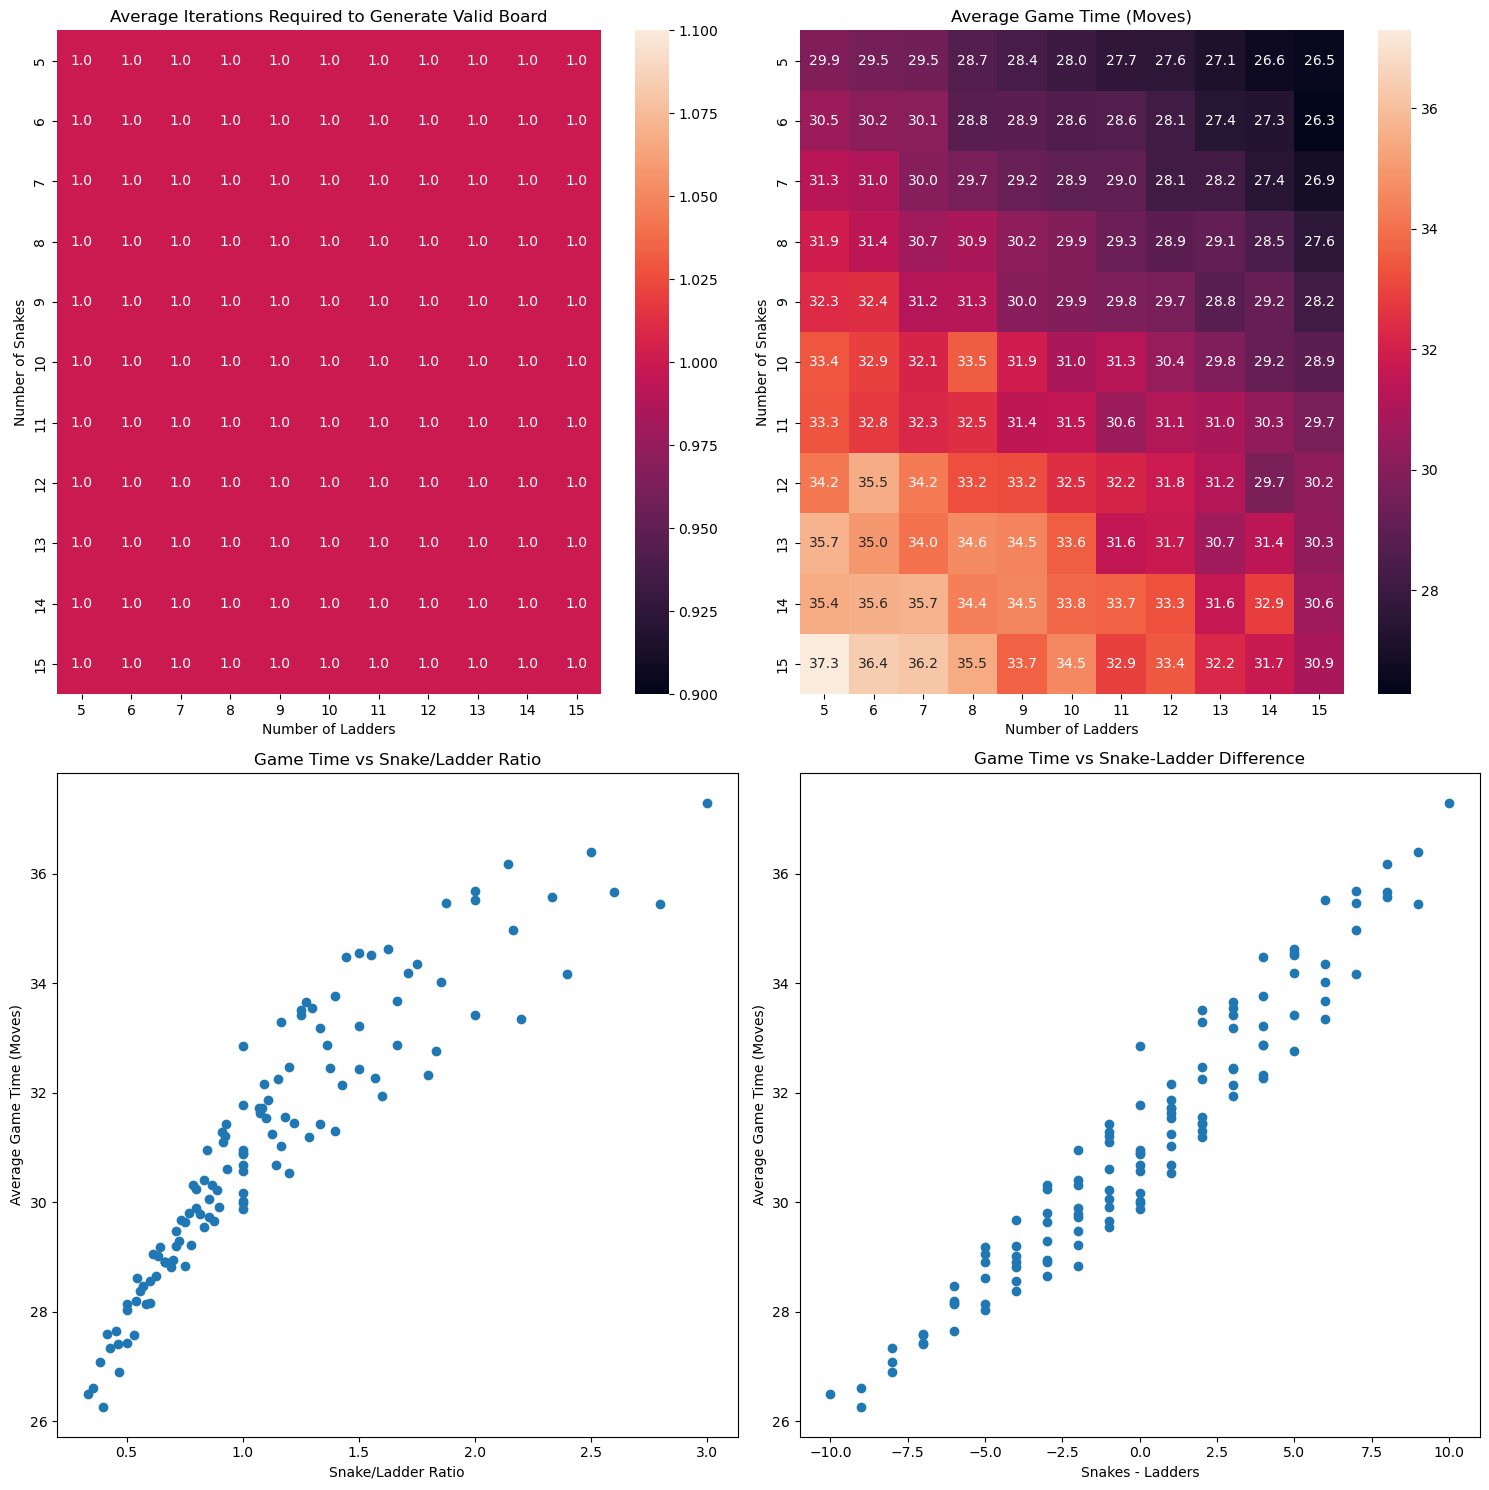

In [37]:
# Run the analysis
if __name__ == "__main__":
    
    print("Running analysis...")
    results_df = run_analysis()
    print("\nAnalysis Results:")
    print(results_df)
    
    print("\nGenerating plots...")
    plot_results(results_df)